In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data from CSV into a DataFrame
data = pd.read_csv('data.csv')

# Drop non-numeric columns (Timestamp and Name)
data = data.drop(columns=['Timestamp', '1. Name'])

# Preprocess the age column to convert it into a numeric format (taking lower bounds of the range)
data['2. Age'] = data['2. Age'].apply(lambda x: int(x.split()[0]))

# Impute categorical missing values with the mode
categorical_columns = ['4. Religion', '5. Ethnicity', '6. Where did you spend the majority of your childhood?']
for col in categorical_columns:
    mode_value = data[col].mode()[0]  # Calculate the mode
    data[col] = data[col].fillna(mode_value)  # Replace missing values with the mode

# Map binary categorical variables to numerical values
binary_mapping = {'No': 0, 'Yes': 1}
binary_map = {'Unacceptable': 0, 'Acceptable': 1}
data['12. Do you know where to find information or support for mental health issues on your campus?'] = data['12. Do you know where to find information or support for mental health issues on your campus?'].map(binary_mapping)
data['14. In my culture, seeking help for mental health issues is seen as...'] = data['14. In my culture, seeking help for mental health issues is seen as...'].map(binary_map)
data['19. Have you ever experienced stigma or discrimination related to mental health within your cultural community?'] = data['19. Have you ever experienced stigma or discrimination related to mental health within your cultural community?'].map(binary_mapping)

# For question 18 (categorical with three options), encode as dummy variables
data = pd.get_dummies(data, columns=['18. Does your community have cultural beliefs or practices that affect how people view mental health? If yes, do these beliefs generally have a positive or negative impact?'], prefix='cultural_beliefs')

# Drop rows with any NaN values
data.dropna(inplace=True)

# Define variables for column names
# Define variables for column names related to perception of mental health
perception_columns = [
    '8. Mental illness is a sign of personal weakness.',
    '9. People with mental illness are dangerous.',
    '10. Mental illness is a taboo subject in my culture.',
    '11. Mental illness can be effectively treated with appropriate support and treatment.'
]

know_where_to_find_info = '12. Do you know where to find information or support for mental health issues on your campus?'
cultural_beliefs_impact_mental_health = 'cultural_beliefs_Yes, positively'
feel_comfortable_seeking_help = '13. I would feel comfortable seeking help for mental health issues if needed.'
seek_help_if_no_negative_impact = '14. In my culture, seeking help for mental health issues is seen as...'
seek_help_cultural_perception = '15. I would seek help for mental health issues if I knew it would not negatively impact my social, academic, or professional reputation.'
stigma_discrimination = '19. Have you ever experienced stigma or discrimination related to mental health within your cultural community?'

# Mental health awareness composite score
data['mental_health_awareness'] = (data[know_where_to_find_info] + data[cultural_beliefs_impact_mental_health]) / 2

# Help-seeking behaviors composite score
data['help_seeking_behaviors'] = (data[feel_comfortable_seeking_help] + data[seek_help_if_no_negative_impact] + data[seek_help_cultural_perception]) / 3


data['perception_mental_health'] = data[perception_columns].mean(axis=1)
correlation_perception = data[stigma_discrimination].corr(data['perception_mental_health'])

print("Correlation between stigma and discrimination and perception of mental health:", correlation_perception)
# Calculate the correlation between stigma and discrimination and mental health awareness
correlation_mental_health = data[stigma_discrimination].corr(data['mental_health_awareness'])

# Calculate the correlation between stigma and discrimination and help-seeking behaviors
correlation_help_seeking = data[stigma_discrimination].corr(data['help_seeking_behaviors'])

print("Correlation between stigma and discrimination and mental health awareness:", correlation_mental_health)
print("Correlation between stigma and discrimination and help-seeking behaviors:", correlation_help_seeking)


Correlation between stigma and discrimination and perception of mental health: 0.006107411404980136
Correlation between stigma and discrimination and mental health awareness: 0.199103932959142
Correlation between stigma and discrimination and help-seeking behaviors: -0.013883658206967289


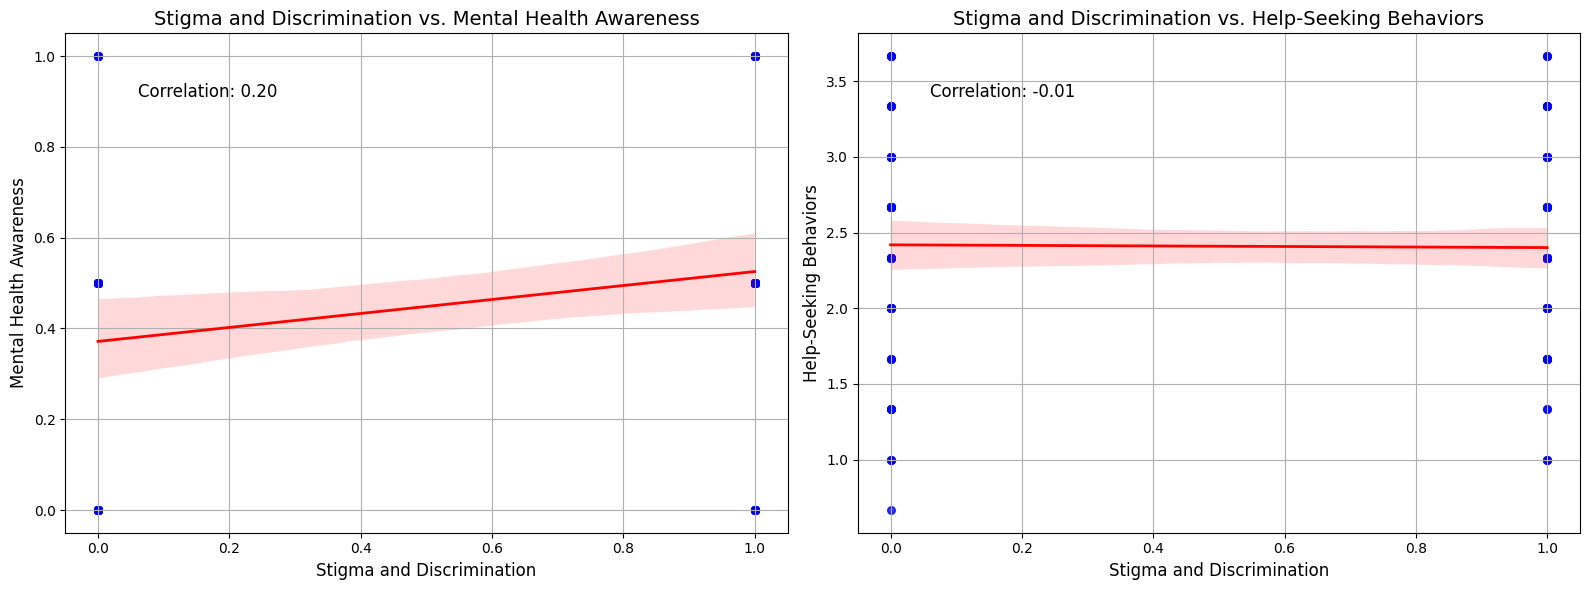

In [41]:
# Plot scatter plots for visualization with trend lines
plt.figure(figsize=(16, 6))  # Increase figure size

plt.subplot(1, 2, 1)
sns.regplot(x=data[stigma_discrimination], y=data['mental_health_awareness'], scatter_kws={'color': 'blue', 's': 30},  # Increase marker size
            line_kws={'color': 'red', 'linewidth': 2})  # Increase line width
plt.title('Stigma and Discrimination vs. Mental Health Awareness', fontsize=14)  # Adjust title font size
plt.xlabel('Stigma and Discrimination', fontsize=12)  # Adjust x-axis label font size
plt.ylabel('Mental Health Awareness', fontsize=12)  # Adjust y-axis label font size
plt.grid(True)  # Add gridlines

# Add annotation for correlation value between stigma and discrimination and mental health awareness
correlation_mental_health = data[stigma_discrimination].corr(data['mental_health_awareness'])
plt.text(0.1, 0.9, f'Correlation: {correlation_mental_health:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.subplot(1, 2, 2)
sns.regplot(x=data[stigma_discrimination], y=data['help_seeking_behaviors'], scatter_kws={'color': 'blue', 's': 30},  # Increase marker size
            line_kws={'color': 'red', 'linewidth': 2})  # Increase line width
plt.title('Stigma and Discrimination vs. Help-Seeking Behaviors', fontsize=14)  # Adjust title font size
plt.xlabel('Stigma and Discrimination', fontsize=12)  # Adjust x-axis label font size
plt.ylabel('Help-Seeking Behaviors', fontsize=12)  # Adjust y-axis label font size
plt.grid(True)  # Add gridlines

# Add annotation for correlation value between stigma and discrimination and help-seeking behaviors
correlation_help_seeking = data[stigma_discrimination].corr(data['help_seeking_behaviors'])
plt.text(0.1, 0.9, f'Correlation: {correlation_help_seeking:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()

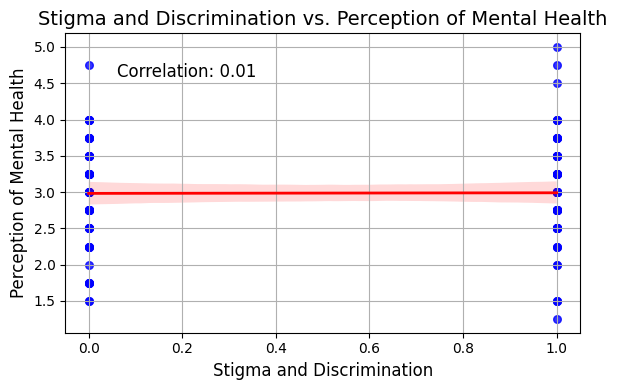

In [42]:
# Add a separate plot for the third correlation value
plt.figure(figsize=(6, 4))  # Adjust figure size

sns.regplot(x=data[stigma_discrimination], y=data['perception_mental_health'], scatter_kws={'color': 'blue', 's': 30},  # Increase marker size
            line_kws={'color': 'red', 'linewidth': 2})  # Increase line width
plt.title('Stigma and Discrimination vs. Perception of Mental Health', fontsize=14)  # Adjust title font size
plt.xlabel('Stigma and Discrimination', fontsize=12)  # Adjust x-axis label font size
plt.ylabel('Perception of Mental Health', fontsize=12)  # Adjust y-axis label font size
plt.grid(True)  # Add gridlines

# Add annotation for correlation value between stigma and discrimination and perception of mental health
correlation_perception = data[stigma_discrimination].corr(data['perception_mental_health'])
plt.text(0.1, 0.9, f'Correlation: {correlation_perception:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()

Central Tendency:
           2. Age  mental_health_awareness  help_seeking_behaviors
count  149.000000               149.000000              149.000000
mean    19.993289                 0.453020                2.409396
std      3.486454                 0.387047                0.656591
min     18.000000                 0.000000                0.666667
25%     18.000000                 0.000000                2.000000
50%     18.000000                 0.500000                2.333333
75%     25.000000                 1.000000                3.000000
max     31.000000                 1.000000                3.666667

Dispersion:
2. Age                     12.155360
mental_health_awareness     0.149805
help_seeking_behaviors      0.431112
dtype: float64
2. Age                     3.486454
mental_health_awareness    0.387047
help_seeking_behaviors     0.656591
dtype: float64


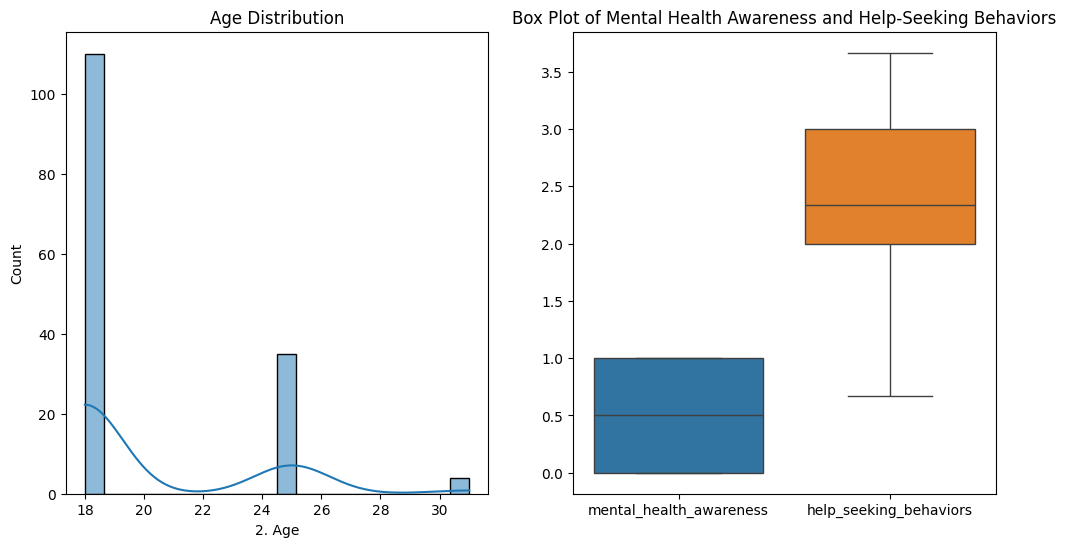

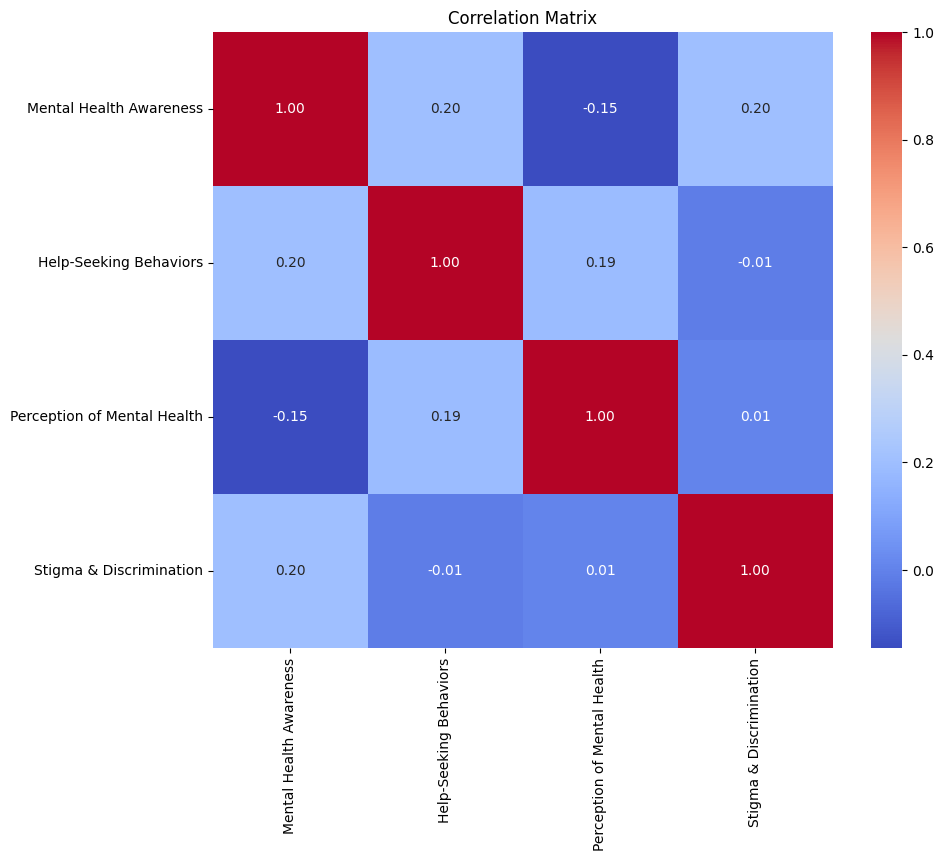

In [43]:
# Descriptive statistics and visualization
# Central Tendency
print("Central Tendency:")
print(data[['2. Age', 'mental_health_awareness', 'help_seeking_behaviors']].describe())

# Dispersion
print("\nDispersion:")
print(data[['2. Age', 'mental_health_awareness', 'help_seeking_behaviors']].var())
print(data[['2. Age', 'mental_health_awareness', 'help_seeking_behaviors']].std())

# Distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['2. Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(data=data[['mental_health_awareness', 'help_seeking_behaviors']])
plt.title('Box Plot of Mental Health Awareness and Help-Seeking Behaviors')
plt.show()

# Correlation Matrix
# Define a dictionary to map column names to desired labels
column_labels = {
    'mental_health_awareness': 'Mental Health Awareness',
    'help_seeking_behaviors': 'Help-Seeking Behaviors',
    'perception_mental_health': 'Perception of Mental Health',
    '19. Have you ever experienced stigma or discrimination related to mental health within your cultural community?': 'Stigma & Discrimination'
}

# Rename the column in the correlation matrix
correlation_matrix = correlation_matrix.rename(columns=column_labels, index=column_labels)

# Plot the correlation matrix with the updated labels
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



<Figure size 1200x800 with 0 Axes>

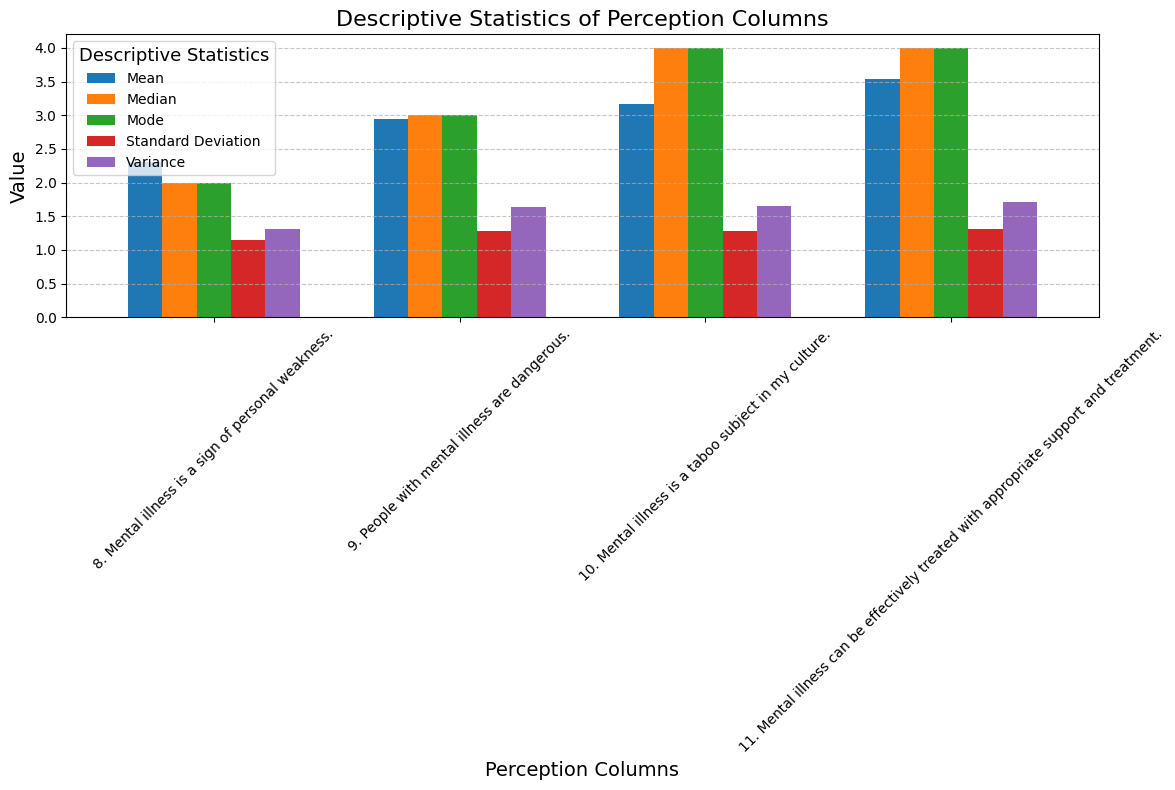

Mean:
8. Mental illness is a sign of personal weakness.                                        2.308725
9. People with mental illness are dangerous.                                             2.946309
10. Mental illness is a taboo subject in my culture.                                     3.161074
11. Mental illness can be effectively treated with appropriate support and treatment.    3.530201
dtype: float64

Median:
8. Mental illness is a sign of personal weakness.                                        2.0
9. People with mental illness are dangerous.                                             3.0
10. Mental illness is a taboo subject in my culture.                                     4.0
11. Mental illness can be effectively treated with appropriate support and treatment.    4.0
dtype: float64

Mode:
8. Mental illness is a sign of personal weakness.                                        2.0
9. People with mental illness are dangerous.                                             3.

In [44]:
perception_stats = {
    'Mean': perception_mean,
    'Median': perception_median,
    'Mode': perception_mode,
    'Standard Deviation': perception_std,
    'Variance': perception_var
}

# Convert the perception_stats dictionary into a DataFrame
perception_stats_df = pd.DataFrame(perception_stats)

# Plotting
plt.figure(figsize=(12, 8))

# Plot grouped bar plot
perception_stats_df.plot(kind='bar', figsize=(12, 8), width=0.7)

# Customize the plot
plt.title('Descriptive Statistics of Perception Columns', fontsize=16)
plt.xlabel('Perception Columns', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Descriptive Statistics', title_fontsize='13')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

# Print the results
print("Mean:")
print(perception_mean)
print("\nMedian:")
print(perception_median)
print("\nMode:")
print(perception_mode)
print("\nStandard Deviation:")
print(perception_std)
print("\nVariance:")
print(perception_var)
print("\nDescriptive Statistics:")
print(perception_describe)
perception_stats = {
    'Mean': perception_mean,
    'Median': perception_median,
    'Mode': perception_mode,
    'Standard Deviation': perception_std,
    'Variance': perception_var
}


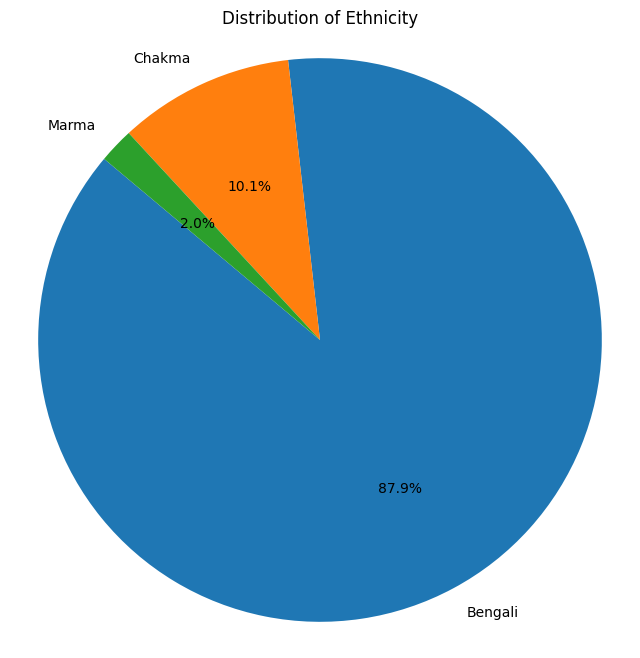

In [45]:
# Count the occurrences of each ethnicity
ethnicity_counts = data['5. Ethnicity'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))

# Plot pie chart
plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=140)

# Customize the plot
plt.title('Distribution of Ethnicity')

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()